# Basics

In this workbook we'll try to walk through some basics of the linear regression models shown in the tutorial.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
workbook_data = pickle.load(open('data/workbook_0.p', 'rb'))
x, y, ye = workbook_data['x'], workbook_data['y'], workbook_data['ye']

[Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), Text(0.5, 1.0, 'Fake Data')]

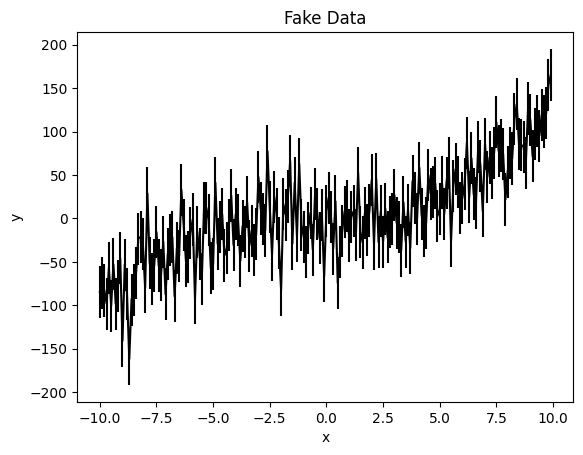

In [3]:
fig, ax = plt.subplots()
ax.errorbar(x, y, ye, color='k')
ax.set(xlabel='x', ylabel='y', title='Fake Data')

## Step 1: Create a design matrix

Create a design matrix for the data above. The design matrix should be a **3rd order polynomial**. The order of the vectors in the design matrix should be $x^0$, $x^1$, ... , $x^n$.

Overwrite `A` below to be your design matrix.

In [4]:
A = np.vstack([x**idx for idx in range(4)]).T

In [5]:
assert isinstance(A, np.ndarray)
assert np.all([np.allclose(a, x**idx) for idx, a in enumerate(A.T)])

In [6]:
A.shape

(200, 4)

## Step 2: Find the best fitting weights
Use the Weighted Least Squares equation to find the mean best fitting weights. 

Overwrite `w` below to be your mean best fitting weights. 

In [41]:
#w = np.linalg.solve(A.T.dot(A), A.T.dot(y))
sigma_w_inv = A.T.dot(A/ye[:, None]**2)
B = A.T.dot(y/ye**2)
w = np.linalg.solve(sigma_w_inv, B)

In [42]:
assert np.isclose(w, workbook_data['true_w'], atol=3*np.linalg.inv(A.T.dot(A/ye[:, None]**2)).diagonal()**0.5).all()

In [43]:
w

array([-3.73104291,  1.18083495,  0.23563164,  0.10823626])

## Step 3: Find the errors on the best fitting weights

Calculate the errors on the best fitting weights (i.e. the standard deviation of the distribution of the best fitting weights.)

Overwrite `w_err` below with your best fitting weights 

In [33]:
#sigma_w_inv = A.T.dot(A/ye[:, None]**2)
w_err = np.linalg.inv(sigma_w_inv).diagonal()**.5

In [34]:
w_err

array([3.18224571, 0.91858162, 0.07118683, 0.01403367])

In [35]:
assert len(w_err) == len(w)
assert np.allclose(w_err, np.asarray([3.18224571, 0.91858162, 0.07118683, 0.01403367]), atol=0.3)

## Step 4: Calculate the model outside of the data bounds

Use your best fitting weights to calculate the mean model at position $x = 11$.

Overwrite `y_11` below with your answer. 

In [14]:
x = 11
y_11 = w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3
y_11 = w @ [x**idx for idx in range(4)]

In [15]:
y_11

181.83203225825363

In [36]:
assert y_11 == 181.83203225825363

## Step 5: Estimate the error on the model at new point

Use `np.random.multivariate_normal` to estimate the model error at  $x = 11$.

Overwrite `y_11_err` below with your answer.

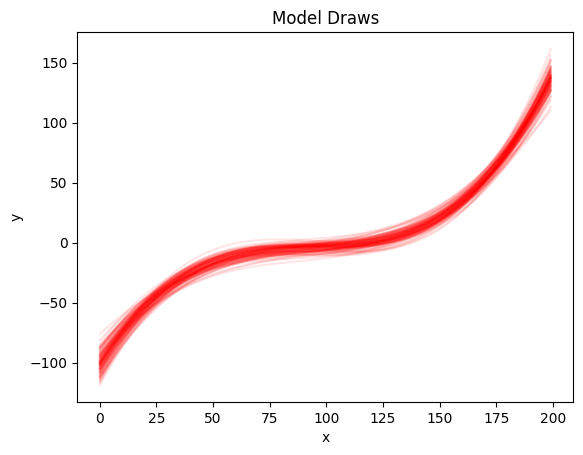

In [32]:
fig, ax = plt.subplots()
weight_samples = np.random.multivariate_normal(w, np.linalg.inv(sigma_w_inv), size=100)
ax.plot(A.dot(weight_samples.T), alpha=0.1, color='r');
ax.set(xlabel='x', ylabel='y', title='Model Draws');

In [40]:
y_11_err = np.std(weight_samples @ [x**idx for idx in range(4)])
y_11_err

12.556582934492912

In [39]:
assert np.isclose(y_11_err, 12, atol=2)